In [1]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Load and clean data

In [2]:
# Read csv

df = pd.read_csv("../preProcessing/rents_encoded.csv")
df = df.drop("Unnamed: 0", axis="columns")

# df = df[["beds", "baths", "square_footage", "year_built", "price"]]

df.head()

,city_Antelope,city_Carmichael,city_Citrus Heights,city_Elk Grove,city_Fair Oaks,city_Folsom,city_Gold River,city_North Highlands,city_Orangevale,city_Rancho Cordova,...,zipcode_95838,zipcode_95841,zipcode_95842,zipcode_95843,zipcode_95864,beds,baths,square_footage,year_built,price
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,3.0,2.0,1043.0,1958.0,1650
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.0,2.0,1000.0,1950.0,1400
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.0,1.5,750.0,1972.0,1695
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.0,2.0,850.0,1972.0,1625
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.0,2.0,1100.0,1972.0,1625


## Train Test Split and Data Normalization

In [3]:
X = df.drop(["price"], axis="columns")
y = df['price']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05) 

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train.values)
X_train_scaled = pd.DataFrame(x_scaled)

X_test_scaled = pd.DataFrame(min_max_scaler.transform(X_test.values))

X_train_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
count,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,...,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000
mean,0.001046,0.054393,0.025105,0.014644,0.020921,0.002092,0.003138,0.009414,0.009414,0.032427,...,0.027197,0.010460,0.012552,0.012552,0.002092,0.018828,0.206665,0.172744,0.037529,0.662493
std,0.032342,0.226911,0.156525,0.120187,0.143193,0.045715,0.055960,0.096620,0.096620,0.177223,...,0.162741,0.101792,0.111390,0.111390,0.045715,0.135990,0.117155,0.100236,0.049972,0.152918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.021781,0.621429
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.028604,0.657143
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.142857,0.040099,0.700000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling

In [6]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 1000)

In [7]:
xg_reg.fit(X_train_scaled,y_train)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:16:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [8]:
preds = xg_reg.predict(X_test_scaled)

In [9]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
mae = mean_absolute_error(y_test, preds)
print("MAE: %f" % (mae))

RMSE: 325.546730
MAE: 223.459099


In [10]:
import pickle

In [11]:
pickle.dump(xg_reg, open("xgboost_model.pkl", "wb"))

In [12]:
pickle.dump(min_max_scaler, open("min_max_scaler.pkl", "wb"))

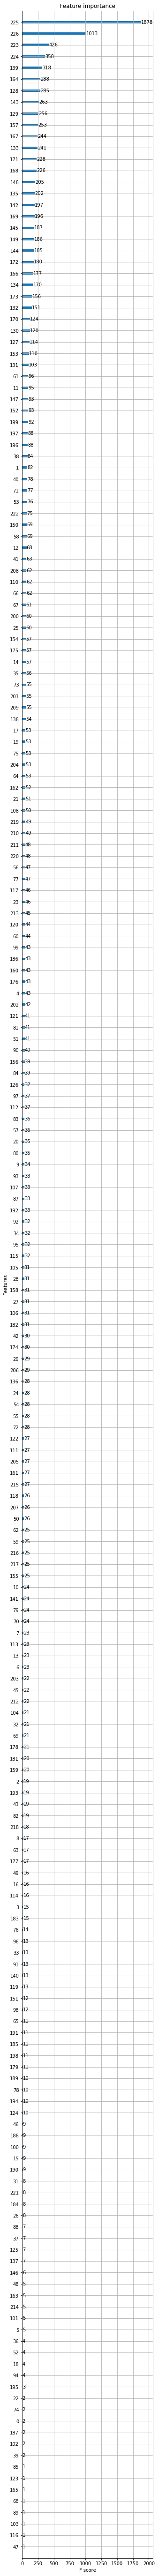

In [15]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 100]
plt.show()

In [19]:
model = pickle.load(open("xgboost_model.pkl", "rb"))
scaler = pickle.load(open("min_max_scaler.pkl", "rb"))

# scaled_features = scaler.transform(features)
# prediction = model.predict(scaled_features)

[21:17:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
len(X.columns.values)